In [1]:
import keras
import numpy as np
import cv2
import os
import sys
import glob
import shutil
from matplotlib import pyplot as plt

from model import *
from data import *

ModuleNotFoundError: No module named 'keras'

In [2]:
def mirror_boards(image, axis=0, board_size = 32):
    if axis == 0:
        f_board = image[:board_size,:,:]
        s_board = image[image.shape[axis] - board_size:,:,:]
    else:
        f_board = image[:,:board_size,:]
        s_board = image[:,image.shape[axis] - board_size:,:]
        
    f_board = cv2.flip(f_board, axis)
    s_board = cv2.flip(s_board, axis)
    
    return np.concatenate([f_board, image, s_board], axis)

In [3]:
def adjust_image(image, board_size = 32):
#     print(image.shape)
    image = mirror_boards(image, board_size = board_size)
    image = mirror_boards(image, axis=1, board_size = board_size)
    
    image = cv2.resize(image, (256, 256))
    
    return image

In [4]:
def adjust_images(images):
    images = [adjust_image(image) for image in images]
    images = np.array(images)
    
    return images

In [5]:
image_1 = cv2.imread('./data/sky/iphone500/test_myown/1.jpg')
image_1 = cv2.cvtColor(image_1, code=cv2.COLOR_BGR2RGB)
image_2 = cv2.imread('./data/sky/iphone500/test_myown/0.jpg')
image_2 = cv2.cvtColor(image_2, code=cv2.COLOR_BGR2RGB)

In [6]:
image_1 = cv2.resize(image_1, (256, 256))
image_2 = cv2.resize(image_2, (256, 256))

In [7]:
images = np.concatenate([np.expand_dims(image_1, 0), np.expand_dims(image_2, 0)], axis=0)

In [8]:
%%time
images = adjust_images(images)

CPU times: user 1.07 ms, sys: 4.51 ms, total: 5.58 ms
Wall time: 5.12 ms


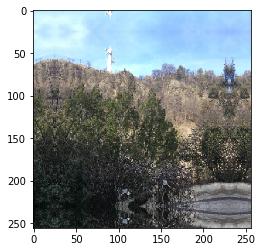

In [9]:
plt.imshow(images[0])

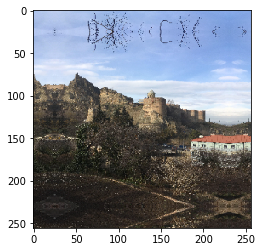

In [10]:
plt.imshow(images[1])